Моделирование гонки вооружений между двумя странами при условии зависимости коэффициентов от времени

In [34]:
import matplotlib.pyplot as plt # графики
import numpy as np # массивы
from scipy.integrate import odeint # ОДУ
import sympy # символьные вычисления

In [49]:
y = sympy.symbols("y")
# скорость «старения» вооружений 
b = [abs(sympy.sin(y)), abs(sympy.sin(y)*sympy.cos(y))]
# скорость наращивания вооружений
a = [abs(sympy.sin(y)), abs(sympy.sin(y)*sympy.cos(y))]
# уровень настороженности 
g = [4*y, 5*y]

'''M1 = []
M2 = []
for i in range(16):
    M1.append(1600 - i*100)
    M1.append(i*100)
    M2.append(i*100)
    M2.append(1600 - i*100)'''

M1 = [100, 200, 400, 500, 700, 800, 1000, 1500, 1400, 1100, 1000, 900, 700, 500]
M2 = [1000, 900, 700, 600, 300, 200, 0, 500, 600, 800, 1000, 1200, 1300, 1500]

In [50]:
t = np.linspace(0, 3, 1000) # массив значений от 0 до 3 (1000 точек)
if (b[0]*b[1] - a[0]*a[1] == 0):
    exist = False
    print("Положения равновесия не существует")
else:
    exist = True
    M1_0 = []
    M2_0 = []
    for i in range(len(t)):
        # положение равновесия первой страны
        M1_0.append(((a[0]*g[1] + b[1]*g[0])/(b[0]*b[1] - a[0]*a[1])).subs("y",t[i]))
        # положение равновесия второй страны
        M2_0.append(((a[1]*g[0] + b[0]*g[1])/(b[0]*b[1] - a[0]*a[1])).subs("y",t[i]))
    print("Начальное | В середине | Конечное (положение равновесия)")
    print("M1: {0:.2f} | {1:.2f} | {2:.2f}".format(float(M1_0[0]),float(M1_0[len(M1_0)//2]),float(M1_0[len(M1_0)-1])))
    print("M2: {0:.2f} | {1:.2f} | {2:.2f}".format(float(M2_0[0]),float(M2_0[len(M1_0)//2]),float(M2_0[len(M1_0)-1])))

Положения равновесия не существует


In [45]:
# задаём правую часть системы ОДУ
def f(m, t, a, b, g):
    dM1dt = (a[0]*m[1] - b[0]*m[0] + g[0]).subs("y",t)
    dM2dt = (a[1]*m[0] - b[1]*m[1] + g[1]).subs("y",t)
    return [dM1dt, dM2dt]

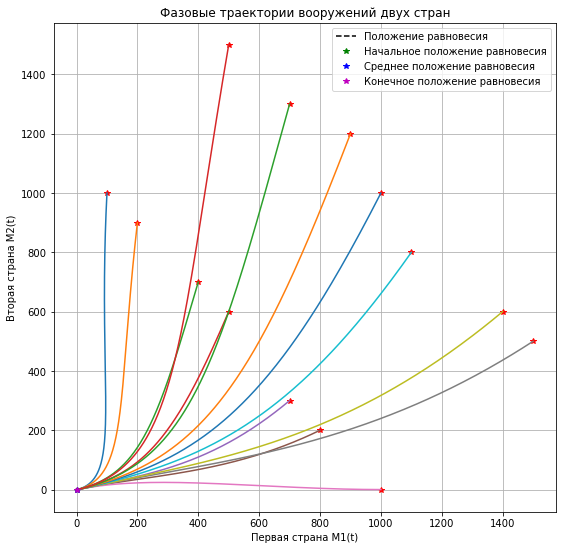

In [48]:
plt.figure(figsize=(9, 9))
plt.title("Фазовые траектории вооружений двух стран") # заголовок
plt.xlabel("Первая страна M1(t)") # ось абсцисс
plt.ylabel("Вторая страна M2(t)") # ось ординат
plt.grid() # включение отображение сетки
#plt.axis([-500, 5000, -500, 5000])

for i in range(len(M1)):
    m0 = [M1[i], M2[i]]
    plt.plot(m0[0], m0[1], '*r')
    sol = odeint(f, m0, t, args=(a,b,g))
    plt.plot(sol[:, 0], sol[:, 1])

if (exist):
    plt.plot(M1_0, M2_0, '--k', label = "Положение равновесия")
    plt.plot(M1_0[0], M2_0[0], 'g*', label = "Начальное положение равновесия")
    plt.plot(M1_0[len(M1_0)//2], M2_0[len(M1_0)//2], 'b*', label = "Среднее положение равновесия")
    plt.plot(M1_0[len(M1_0)-1], M2_0[len(M2_0)-1], 'm*', label = "Конечное положение равновесия")
    plt.legend()
plt.show()

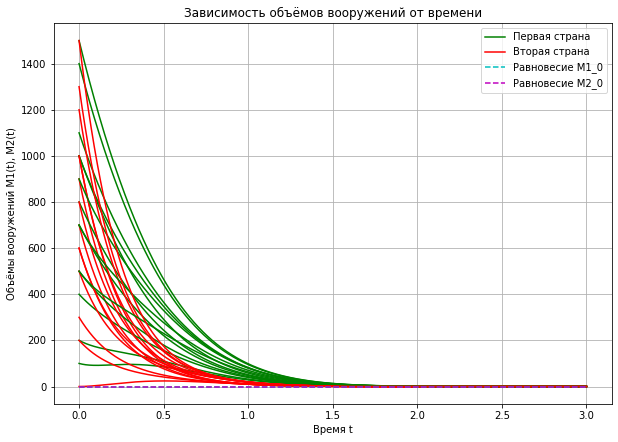

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Зависимость объёмов вооружений от времени") # заголовок
plt.xlabel("Время t") # ось абсцисс
plt.ylabel("Объёмы вооружений M1(t), M2(t)") # ось ординат
plt.grid() # включение отображение сетки
#plt.axis([-0.05, 2, -0.1, 1500])

for i in range(len(M1)):
    m0 = [M1[i], M2[i]]
    sol = odeint(f, m0, t, args=(a,b,g))
    line1, = plt.plot(t, sol[:, 0], 'g')
    line2, = plt.plot(t, sol[:, 1], 'r')

if (exist):
    line3, = plt.plot(t, M1_0, '--c')
    line4, = plt.plot(t, M2_0, '--m')
    plt.legend((line1, line2, line3, line4), ["Первая страна", "Вторая страна", "Равновесие M1_0", "Равновесие M2_0"])
else:
    plt.legend((line1, line2), ["Первая страна", "Вторая страна"])
plt.show()